In [2]:
"""
EXPLORATORY DATA ANALYSIS
========================

Goal: Find PATTERNS in how data gets messy
This helps us build better ML models later
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/raw/titanic_messy.csv')

print("🔍 Exploring patterns in messy data...")

🔍 Exploring patterns in messy data...


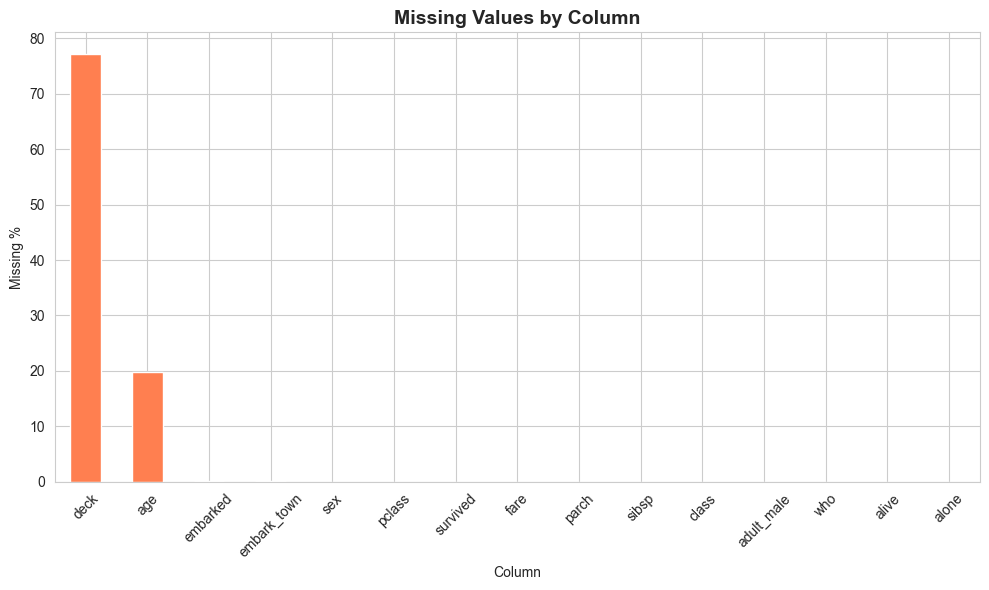


📊 Insight:
- 'deck' column has 77% missing → Should we drop it or fill it?
- 'age' has 20% missing → Can estimate from other columns
- 'embarked_town' has 0.2% missing → Easy to fill


In [3]:
"""
PATTERN 1: Where do missing values appear most?
"""

# Visualize missing data
import missingno as msno  # pip install missingno

# If missingno not installed, do it manually
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_pct.plot(kind='bar', color='coral')
plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Column')
plt.ylabel('Missing %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n📊 Insight:")
print("- 'deck' column has 77% missing → Should we drop it or fill it?")
print("- 'age' has 20% missing → Can estimate from other columns")
print("- 'embarked_town' has 0.2% missing → Easy to fill")

In [4]:
"""
PATTERN 2: What data types are common?
"""

type_counts = df.dtypes.value_counts()

print("\n📊 Data Type Distribution:")
print(type_counts)

print("\n💡 Insight:")
print(f"- {type_counts.get('object', 0)} text columns (potential format issues)")
print(f"- {type_counts.get('float64', 0)} float columns (potential outliers)")
print(f"- {type_counts.get('int64', 0)} integer columns (check for negatives)")


📊 Data Type Distribution:
str        7
int64      4
float64    2
bool       2
Name: count, dtype: int64

💡 Insight:
- 0 text columns (potential format issues)
- 2 float columns (potential outliers)
- 0 integer columns (check for negatives)


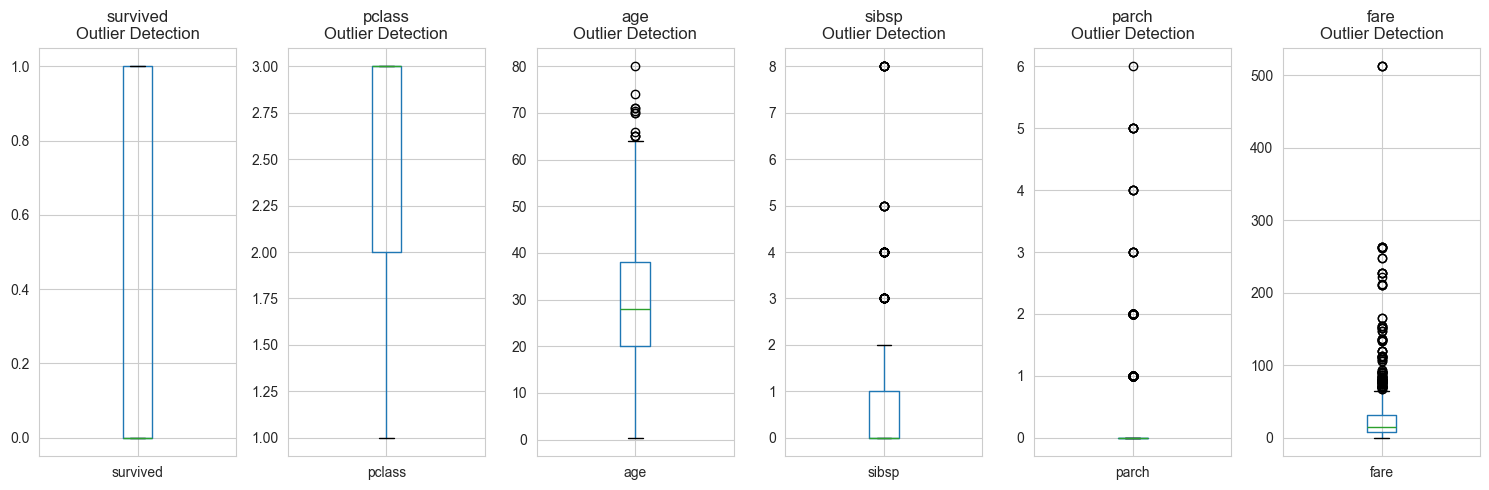


📊 Outlier Analysis:
- age: 11 outliers (1.2%)
- sibsp: 46 outliers (5.2%)
- parch: 213 outliers (23.9%)
- fare: 116 outliers (13.0%)


In [5]:
"""
PATTERN 3: How extreme are outliers?
"""

# For each numeric column, plot boxplot
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))

for idx, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'{col}\nOutlier Detection')
    
plt.tight_layout()
plt.show()

print("\n📊 Outlier Analysis:")
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))][col]
    
    if len(outliers) > 0:
        print(f"- {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

In [6]:
"""
KEY PATTERNS DISCOVERED
======================

1. Missing Values:
   - Structural missing (entire column mostly empty) → Drop column
   - Random missing (scattered) → Fill with median/mode
   - Pattern missing (related to other columns) → Smart filling

2. Data Types:
   - Numbers stored as text → Need to convert
   - Dates stored as text → Need to parse
   - Mixed types in same column → Need to standardize

3. Outliers:
   - Age: Reasonable range (0-80), some outliers but valid
   - Fare: High variance, some extreme values (first class cabins)
   
4. Format Issues:
   - Names: Consistent format
   - Cabin: Mixed formats (letter + number)

NEXT STEPS:
-----------
- Repeat this for 5-10 more datasets
- Build pattern library
- Use patterns to design ML features
"""

print("\n✅ EDA Complete!")
print("\nKey Takeaway: Data messiness has PATTERNS, not random chaos")


✅ EDA Complete!

Key Takeaway: Data messiness has PATTERNS, not random chaos
